# Introduction to Neural Networks: Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer
 
* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location 
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer 
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary 

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values 
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [2]:
# Importing essential libraries for data manipulation
import pandas as pd  
import numpy as np  

# Importing libraries for data visualization
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns  
sns.set_theme()  

# Importing libraries for data preprocessing and scaling
from sklearn import preprocessing  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  

# Importing libraries for various metric scores and analysis
from sklearn.metrics import (
    accuracy_score,  # Accuracy metric
    confusion_matrix,  # Confusion matrix metric
    precision_score,  # Precision metric
    recall_score,  # Recall metric
    f1_score,  # F1 score metric
    precision_recall_curve,  # Precision-Recall curve
    auc,  # Area Under the Curve metric
    roc_auc_score,  # ROC-AUC score metric
    roc_curve,  # ROC curve
)
from sklearn.decomposition import PCA  # Principal Component Analysis


import warnings  # Suppressing warnings for cleaner output
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'  # or any {'0', '1', '2', '3'}


# Importing TensorFlow and Keras for neural network modeling
import tensorflow as tf  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Dropout  
from tensorflow.keras import optimizers  
from tensorflow.keras.optimizers import Adam,RMSprop  
from scikeras.wrappers import KerasClassifier

import keras  
from keras import backend as K  
from keras.models import Sequential  
from keras.layers import Dense, Dropout, BatchNormalization  



## Loading the dataset

In [3]:
df = pd.read_excel(r"C:\Users\SHREYA\Downloads\Churn.xlsx")


## Data Overview

In [4]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
#checking the shape of the dataset
df.shape

(10000, 14)

There are 10000 rows and 14 columns in the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<h4>Observations:</h4>-Every variable is numerical, with the exception of Surname, Geography, and Gender.



In [7]:
#checking for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<h4>Observations:</h4>There are no missing values in the dataset

In [8]:
# checking for duplicate values
df.duplicated().sum()

0

<h4>Observations:</h4>There are no duplicate values in the dataset

In [9]:
# dropping `RowNumber`, `CustomerId`, and `Surname`
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

<h4>Observations:</h4>We drop columns "RowNumber", "CustomerId", "Surname" as they don't give us any additional information in the dataset.

In [10]:
# Converting 'Gender' and 'Geography' columns to categorical
df[['Gender', 'Geography']] = df[['Gender', 'Geography']].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


<h4>Observations:</h4>There are 9 numerical columns in the dataset, and two categorical columns.

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


<h4>Observations:</h4>-The average consumer credit score is roughly 650, indicating a comparatively good credit standing.
<br>-37 is the median age, indicating a somewhat younger clientele.
<br>-With a 25th percentile value of 0, the "Balance" variable indicates that a sizable percentage of clients have a balance of 0.There is a possibility of right-skewness.
<br>-The boolean variables HasCrCard, IsActiveMember, and Exited have values of either 0 or 1.
<br>-With a mean of 0.2037, "Exited" shows a class imbalance, meaning that only about 20.37% of consumers have left. 


In [13]:
df.describe(exclude="number").T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


<h4>Observations:</h4>-The majority of customers in the dataset are from 'France,' which appears 5014 times.
<br>-Most customers in the dataset is 'Male,' with a frequency of 5457.

## Exploratory Data Analysis

**Questions**:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
2. How many active members are there with the bank?
3. How are the different customer attributes correlated to each other?
4. Who is churning more when compared to males and females?  
5. Customers from which geographical part are churning more?

In [14]:
def histogram_boxplot(data, feature, figsize=(10,6)):
    """
    Boxplot and histogram combined with KDE curve

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10, 6))
    """
    # Create subplots with shared x-axis
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Creating Boxplot
    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color="green")

    # Creating Histogram with KDE curve
    sns.histplot(data=data, x=feature, color="green", kde=True, ax=ax_hist)

    # Adding mean and median lines to the histogram
    ax_hist.axvline(data[feature].mean(), color="red", linestyle="--", label="Mean")
    ax_hist.axvline(data[feature].median(), color="black", linestyle="-", label="Median")

    ax_box.set(xlabel='')
    ax_hist.set_xlabel(feature)
    ax_hist.legend()

  
    plt.tight_layout()

  
    plt.show()

<h3>Q1-What is the distribution of the credit score of customers? 

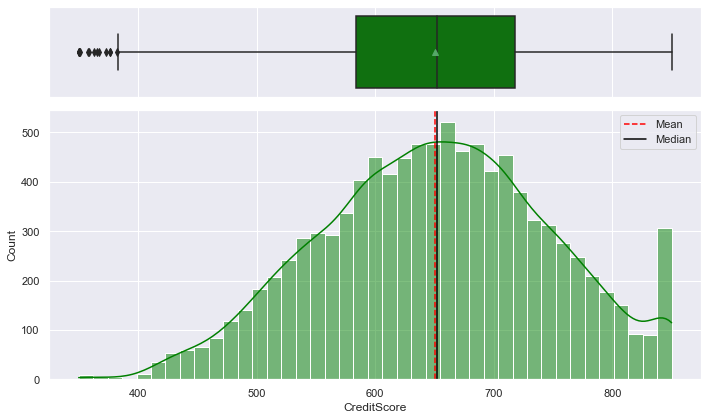

In [15]:
histogram_boxplot(df, "CreditScore")

<h4>Observations:</h4>-The distribution of credit score is approximately normal.
<br>-It has a few outliers on the left

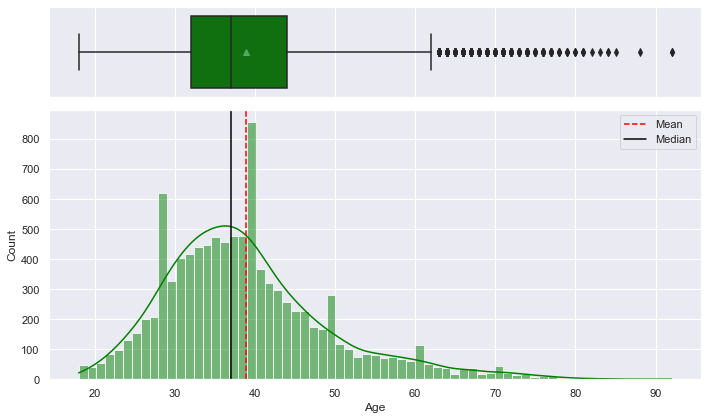

In [16]:
histogram_boxplot(df, "Age")

<h4>Observations:</h4>-The distribution of age shows a right skew with the mean greater than the median.
<br>-There are outliers on the right.

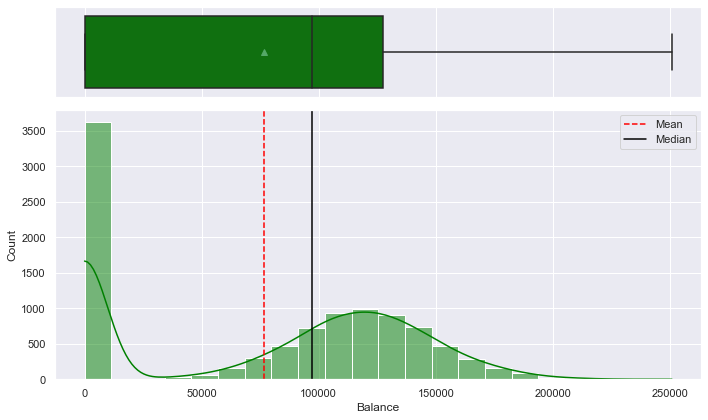

In [17]:
histogram_boxplot(df, "Balance")

<h4>Observations:</h4>The distribution of Balance has a left skew due to the presence of high number of 0 balance accounts.


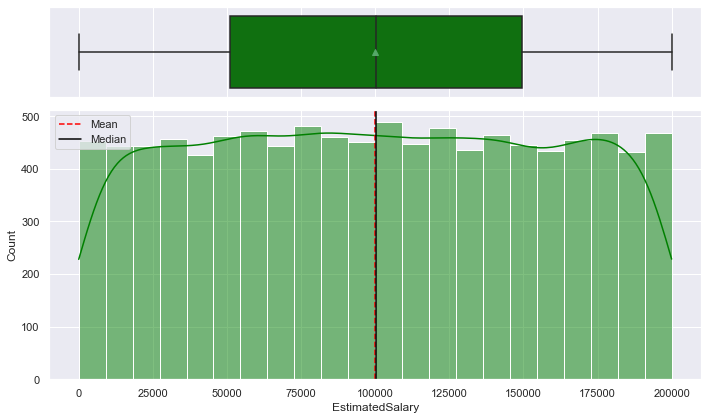

In [18]:
histogram_boxplot(df, "EstimatedSalary")

<h4>Observations:</h4>-The distribution of salary is approximately uniform ranging from 0 to 200000.
<br>-The mean and median are approximately equal at 10,000

In [19]:
def categorical_barplot(data, categorical_column):
    """
    Function to generate a bar plot with percentage labels.

    Parameters:
    - data: DataFrame
    - categorical_column: Categorical column name
    """
    plt.figure(figsize=(6, 6))

    
    sns.countplot(x=categorical_column, data=data, palette='viridis')

  
    total_entries = len(data[categorical_column])
    for p in plt.gca().patches:
        percentage = '{:.1f}%'.format((p.get_height() / total_entries) * 100)
        x_position = p.get_x() + p.get_width() / 2 - 0.1
        y_position = p.get_height() + 0.05
        plt.text(x_position, y_position, percentage, ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f'Bar Plot of {categorical_column} with Percentage Labels')
    plt.show()



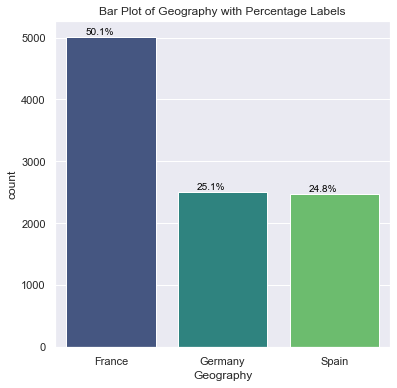

In [20]:
categorical_barplot(df, 'Geography')

<h4>Observations:</h4>Approximately 50% of the Customers in the dataset are from France.

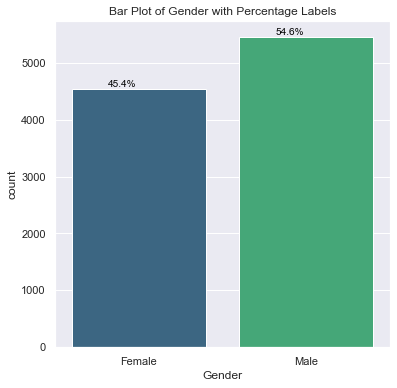

In [21]:
categorical_barplot(df, 'Gender')

<h4>Observations:</h4>Males have higher representation than females in the dataser at 54.6%

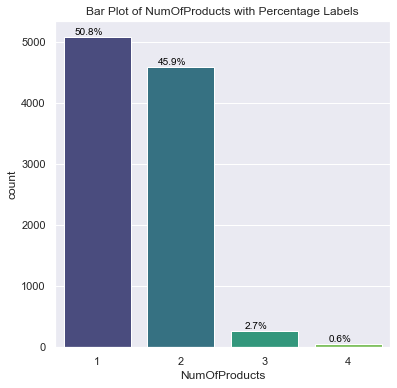

In [22]:
categorical_barplot(df, 'NumOfProducts')

<h4>Observations:</h4>
Around 51% of the customers in the dataset possess a single product from the bank, while 46% own two products.

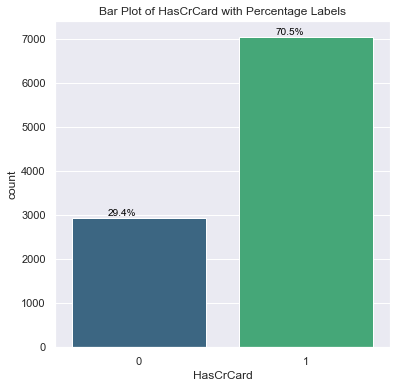

In [23]:
categorical_barplot(df, 'HasCrCard')

<h4>Observations:</h4>70.5% of the customers in dataset own a credit card.

<h3> Q-2How many active members are there with the bank

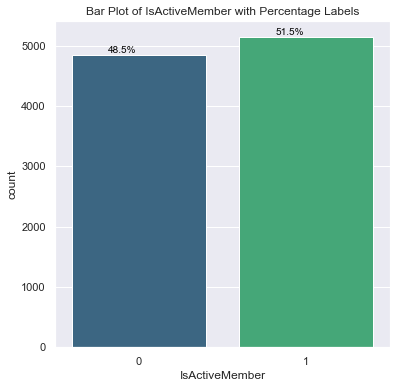

In [24]:
categorical_barplot(df, 'IsActiveMember')

In [25]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

<h4>Observations:</h4>51.5%(5151) of customers can be considered an active of the bank compared to 48.5% (4849) who aren't.

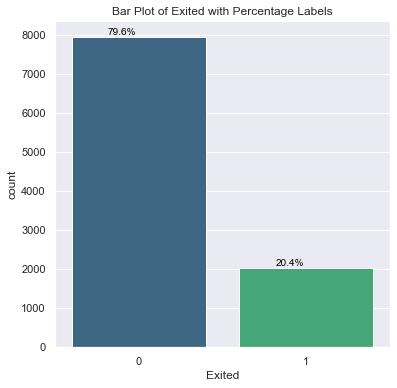

In [26]:
categorical_barplot(df, 'Exited')

<h4>Observations:</h4>20.4% of the customers in the bank have exited the bank, while 79.6% are still part of the bank.

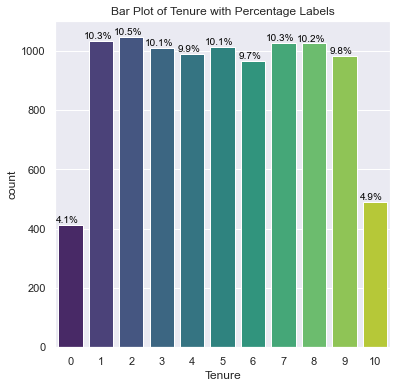

In [27]:
categorical_barplot(df,'Tenure')

<h4>Observations:</h4>Merely 4% of the customers have a tenure of 0, and 6% have a tenure of 10. Additionally, each of the tenures from 1 to 9 years. is represented by approximately 10% of the customers.







<h3> Q-3 How are the different customer attributes correlated to each other?

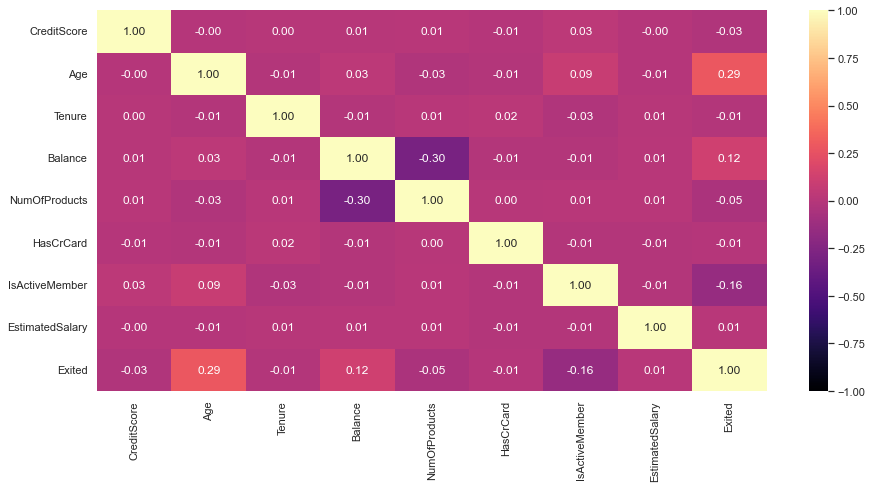

In [28]:
# checking for correlations
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="magma")
plt.show()

<h4>Observations:</h4>-There is a slight positive correlation of 0.29 between age and the likelihood of leaving the bank (Exited = 1). 
<br>-There is a negative correlation between balance and the number of products a customer has purchased through the bank.
<br>-Overall, the dataset exhibits low correlations between its variables.







In [29]:
def bar_plot(data, x_col, hue_col, title):
    """
    Function to generate a bar plot for two categorical variables.

    Parameters:
    - data: DataFrame
    - x_col: Column name for the x-axis
    - hue_col: Column name for color differentiation (hue)
    - title: Title of the plot
    """
    plt.figure(figsize=(12, 8))  
    ax = sns.countplot(x=x_col, hue=hue_col, data=data, palette='viridis', edgecolor='white')
    
   
    total_entries = len(data)
    for p in ax.patches:
        percentage = '{:.1f}%'.format((p.get_height() / total_entries) * 100)
        x_position = p.get_x() + p.get_width() / 2
        y_position = p.get_height() + 0.02  # Adjusted y_position to place labels above bars
        ax.annotate(percentage, (x_position, y_position), ha='center', va='bottom', fontsize=12, color='black')

   
    plt.xlabel(x_col.capitalize())
    plt.ylabel('Count')
    plt.title(title)
    plt.legend(title=hue_col.capitalize(), loc='upper right')

    
    plt.show()

<h3> Q-4 Who is churning more when compared to males and females?

In [30]:
def stacked_bar_plot(data, x_col, hue_col, title):
    """
    Function to generate a stacked bar plot for two categorical variables with percentage labels.

    Parameters:
    - data: DataFrame
    - x_col: Column name for the x-axis
    - hue_col: Column name for color differentiation (hue)
    - title: Title of the plot
    """
    
    cross_tab = pd.crosstab(data[x_col], data[hue_col], normalize='index')

    plt.figure(figsize=(12, 8))

    
    cross_tab.plot(kind='bar', stacked=True, color=['pink', 'coral'], edgecolor='white')

    # percentage labels
    for i in range(len(cross_tab)):
        total_entries = cross_tab.sum(axis=1).iloc[i]
        for j in range(len(cross_tab.columns)):
            percentage = '{:.1f}%'.format(cross_tab.iloc[i, j] * 100)
            x_position = i
            y_position = cross_tab.iloc[i, :j].sum() + cross_tab.iloc[i, j] / 2
            plt.text(x_position, y_position, percentage, ha='center', va='center', fontsize=10, color='black',rotation=90)

  
    plt.xlabel(x_col.capitalize())
    plt.ylabel('Count')
    plt.title(title)
    plt.legend(title=hue_col.capitalize(), loc='upper right')

   
    plt.show()

<Figure size 864x576 with 0 Axes>

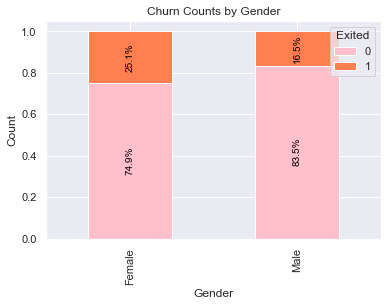

In [31]:
stacked_bar_plot(df, 'Gender', 'Exited', 'Churn Counts by Gender')

<h4>Observations:</h4>More women have exited(25%) as compared to men(16.4%) from the bank.

<h3>Q-5 Customers from which geographical part are churning more?

<Figure size 864x576 with 0 Axes>

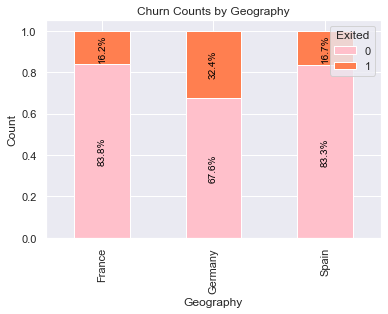

In [32]:
stacked_bar_plot(df, 'Geography', 'Exited', 'Churn Counts by Geography')

<h4>Observations:</h4>Germany has the highest number of customers who have churned(32%) compared to France(16.1%) and Spain(16.6%).

<Figure size 864x576 with 0 Axes>

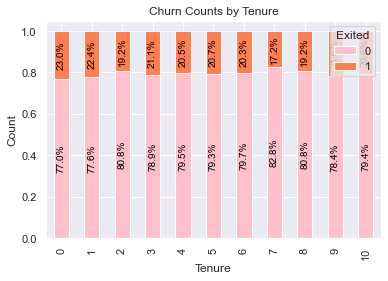

In [33]:
stacked_bar_plot(df, 'Tenure', 'Exited', 'Churn Counts by Tenure')



<h4>Observations:</h4>Customers with a tenure of 1 year and 0 year have a higher churn count compared to others.

<Figure size 864x576 with 0 Axes>

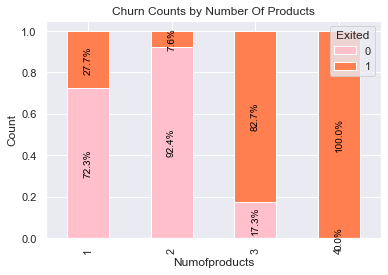

In [34]:
stacked_bar_plot(df, 'NumOfProducts', 'Exited', 'Churn Counts by Number Of Products')

<h4>Observations:</h4>-All the customers who purchased 4 products left the bank.
<br>-Lowest churn percentage was among the customers who purchased 2 products.

<Figure size 864x576 with 0 Axes>

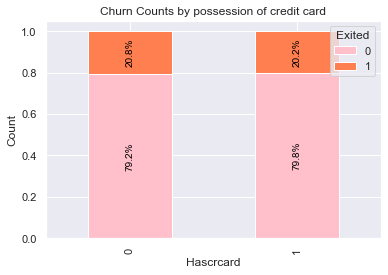

In [35]:
stacked_bar_plot(df, 'HasCrCard', 'Exited', 'Churn Counts by possession of credit card')

<h4>Observations:</h4>Churn count is approximately similar for customers who own a credit and those who don't.

<Figure size 864x576 with 0 Axes>

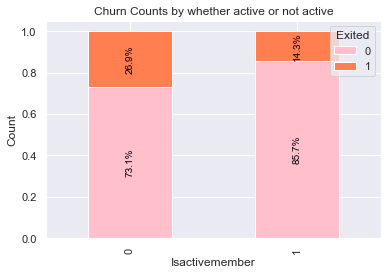

In [36]:
stacked_bar_plot(df, 'IsActiveMember', 'Exited', 'Churn Counts by whether active or not active')

<h4>Observations:</h4>Non-Active members of the bank have a higher churn count.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

<h4>Missing Value and Duplicate Data Treatment:</h4>There are no missing and duplicated values in the dataset, and hence it doesn't require any treatment.

<h4>Outlier Removal

Outliers are present in Age and CreditScore. However, people with ages or credit ratings that differ greatly from the average are frequently encountered in real-world situations, and these differences can offer important insights into the complexity and diversity of the data. Hence we will keep the outliers

In [37]:
data = df.copy()

In [38]:
# Splitting the Data
X_data = data.drop(["Exited"], axis=1)

# target variable
y_data = data["Exited"]  # target variable

In [39]:
# Creating dummy variables for the 2 the categorical variables
X_data = pd.get_dummies(X_data, columns=["Geography", "Gender"],drop_first=True)
X_data.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,1


In [40]:
X_data.shape

(10000, 11)

The predictor(X) dataframe has 10,000 rows and 11 columns.

In [41]:
# Splitting the data up in train, validation and test sets


X_temp, X_test, y_temp, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1, stratify=y_data)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=1, stratify=y_temp)

In [42]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6400, 11)
Shape of X_val: (1600, 11)
Shape of X_test: (2000, 11)
Shape of y_train: (6400,)
Shape of y_val: (1600,)
Shape of y_test: (2000,)


In [43]:
# Specifying columns to scale
columns_to_scale = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]

# Create a scaler
scaler = StandardScaler()

# Fiting on the training set
scaler.fit(X_train[columns_to_scale])

# Transforming the training set
X_train[columns_to_scale] = scaler.transform(X_train[columns_to_scale])

# Transforming the validation and test sets
X_val[columns_to_scale] = scaler.transform(X_val[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [44]:
X_train.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5292,0.976155,-1.047381,0.347046,-1.212523,2,1,0,0.939366,0,0,0
3879,1.316949,-0.572048,1.377238,1.214872,2,0,0,1.389376,0,0,0
6118,-0.190810,0.949016,0.003649,1.473810,1,0,0,0.692477,0,0,0
4044,0.077695,-0.667115,1.033841,-1.212523,1,1,1,-0.347954,0,0,1
3202,-0.893054,-0.572048,-0.339749,0.961751,1,1,0,-0.647963,0,0,0
6142,1.079426,-0.096715,-1.369941,-1.212523,2,1,0,-1.386390,0,0,0
7804,0.346200,1.899682,1.377238,0.746234,1,0,1,-1.472138,1,0,1
9731,-0.448988,-0.952314,0.690443,0.428567,1,1,0,1.093685,1,0,1
9086,-0.035903,-0.952314,-1.026544,-1.212523,2,1,0,1.368194,0,1,0
2539,-0.686511,0.663817,0.347046,0.184697,2,1,0,0.347509,1,0,0


## Model Building

### Model Evaluation Criterion

Recall is important when the cost of false negatives is high.In the case of customer churn prediction, reducing false negatives is crucial since it minimizes the situations in which the model is unable to identify customers who are most likely to depart. False negatives are the result of missed chances to take preventative measures, such as providing incentives to keep consumers and stop them from leaving.

### Model Building: Neural Network

In [46]:
# initializing the model
model = Sequential()

#input layer
model.add(Dense(units=32, activation='relu', input_dim=11))

#hidden layer
model.add(Dense(units=64, activation='relu'))

#output layer
model.add(Dense(1, activation='sigmoid'))



In [48]:
# Creating the model with SGD optimizer with default learning rate and recall as the metric
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])




In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                384       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2561 (10.00 KB)
Trainable params: 2561 (10.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
X_train = X_train.astype(int)
X_val = X_val.astype(int)
X_test = X_test.astype(int)

y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

In [51]:
history = model.fit(X_train, y_train, epochs=50,validation_data=(X_val, y_val), batch_size=32)

Epoch 1/50

200/200 [==============================] - 2s 6ms/step - loss: 0.5593 - recall_1: 0.0667 - val_loss: 0.4920 - val_recall_1: 0.0000e+00
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4904 - recall_1: 0.0000e+00 - val_loss: 0.4829 - val_recall_1: 0.0000e+00
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4832 - recall_1: 0.0000e+00 - val_loss: 0.4766 - val_recall_1: 0.0000e+00
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4771 - recall_1: 0.0000e+00 - val_loss: 0.4715 - val_recall_1: 0.0000e+00
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4723 - recall_1: 0.0000e+00 - val_loss: 0.4668 - val_recall_1: 0.0000e+00
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4680 - recall_1: 7.6687e-04 - val_loss: 0.4631 - val_recall_1: 0.0031
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4646 - recall_1: 0.0031 - val_l

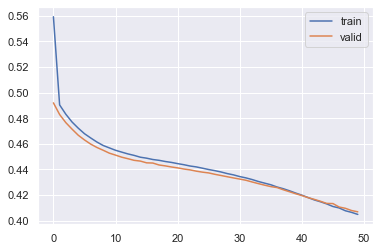

In [52]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("train", "valid"), loc=0)

Since the learning curves (training and validation) closely follow each other across epochs, it indicates that the model is likely generalizing well to both the training and validation datasets. 

200/200 [==============================] - 1s 2ms/step


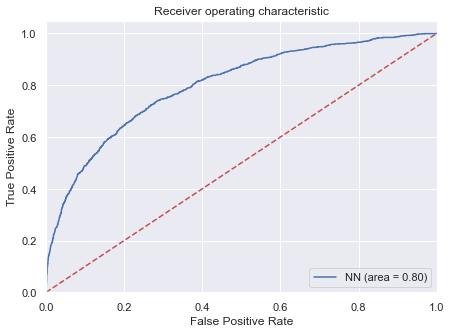

In [53]:
# ROC-AUC on training set
NN_roc_auc_train= roc_auc_score(y_train.astype(float), model.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train.astype(float), model.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

50/50 [==============================] - 0s 1ms/step


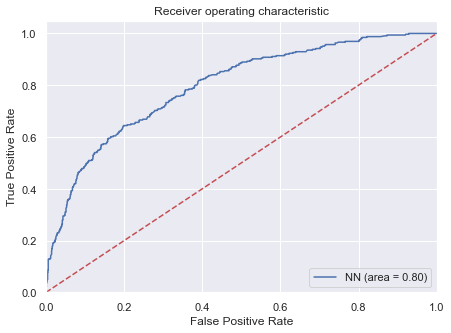

In [54]:
# ROC-AUC on validation set
NN_roc_auc_val = roc_auc_score(y_val.astype(float), model.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val.astype(float), model.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()


In [55]:
# Optimal threshold using AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train.astype(float), model.predict(X_train))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

200/200 [==============================] - 0s 2ms/step
0.20008567


In [56]:
def make_confusion_matrix(
    cf,
    group_names=None,
    categories="auto",
    count=True,
    percent=True,
    cbar=True,
    xyticks=True,
    xyplotlabels=True,
    sum_stats=True,
    figsize=None,
    cmap="Blues",
    title=None,
):
    """
    This function will make a pretty plot of an sklearn Confusion Matrix cf using a Seaborn heatmap visualization.
    
    """

    blanks = ["" for _ in range(cf.size)]

    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = [
            "{0:.2%}".format(value) for value in cf.flatten() / np.sum(cf)
        ]
    else:
        group_percentages = blanks

    box_labels = [
        f"{v1}{v2}{v3}".strip()
        for v1, v2, v3 in zip(group_labels, group_counts, group_percentages)
    ]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy = np.trace(cf) / float(np.sum(cf))

        # if it is a binary confusion matrix, show some more stats
        if len(cf) == 2:
            # Metrics for Binary Confusion Matrices
            precision = cf[1, 1] / sum(cf[:, 1])
            recall = cf[1, 1] / sum(cf[1, :])
            f1_score = 2 * precision * recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy, precision, recall, f1_score
            )
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
            
            
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize is None:
        # Get default figure size if not set
        figsize = plt.rcParams.get("figure.figsize")

    if not xyticks:
        # Do not show categories if xyticks is False
        categories = False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(
        cf,
        annot=box_labels,
        fmt="",
        cmap=cmap,
        cbar=cbar,
        xticklabels=categories,
        yticklabels=categories,
    )

    if xyplotlabels:
        plt.ylabel("True label")
        plt.xlabel("Predicted label" + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)
        
    # Creating a DataFrame for metrics
    
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy, precision, recall, f1_score]
    })

    return metrics_df.T    


50/50 [==============================] - 0s 2ms/step


,0,1,2,3
Metric,Accuracy,Precision,Recall,F1 Score
Score,0.718125,0.392796,0.702454,0.50385


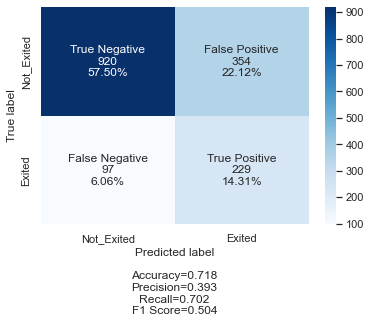

In [57]:
# Predictions on validation set
y_pred_val = model.predict(X_val)

# Applying the optimal threshold
y_pred_val_binary = (y_pred_val > optimal_threshold_auc_roc).astype(int)

# Creating confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val_binary)

# Define labels and categories
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]

# Plotting confusion matrix
make_confusion_matrix(cm_val, group_names=labels, categories=categories, cmap="Blues")
 





1. **Accuracy (0.718125)**: This is the proportion of total predictions that the model got right. In this case, the model correctly predicted whether a customer will leave the bank or not about 71.81% of the time.

2. **Precision (0.392796)**: This is the proportion of positive identifications (i.e., a customer will leave the bank) that were actually correct.When the model predicted that a customer will leave the bank, it was correct only about 39.28% of the time.

3. **Recall (0.702454)**: This is the proportion of actual positives that were identified correctly. In this case, the model correctly identified 70.25% of the customers who actually left the bank.

4. **F1 Score (0.50385)**:  F1 Score is approximately 0.50, which is not very high.



### Model Building: Neural Network model with Adam Optimizer

In [58]:
model1 = Sequential()

# Adding the input layer 
model1.add(Dense(units=32, activation='relu', input_dim=11))

#Adding the hidden layer
model1.add(Dense(units=16, activation="relu"))

# Adding the output layer
model1.add(Dense(1, activation='sigmoid'))




In [59]:
# Compiling the model

model1.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

In [60]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                384       
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 929 (3.63 KB)
Trainable params: 929 (3.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
history1 = model1.fit(X_train, y_train, epochs=50,validation_data=(X_val, y_val), batch_size=32)


Epoch 1/50
200/200 [==============================] - 3s 6ms/step - loss: 0.5072 - recall_2: 0.1035 - val_loss: 0.4564 - val_recall_2: 0.0460
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4547 - recall_2: 0.0897 - val_loss: 0.4442 - val_recall_2: 0.1043
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4446 - recall_2: 0.1288 - val_loss: 0.4354 - val_recall_2: 0.1595
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4357 - recall_2: 0.1687 - val_loss: 0.4280 - val_recall_2: 0.1534
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4259 - recall_2: 0.2032 - val_loss: 0.4186 - val_recall_2: 0.1718
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4148 - recall_2: 0.2408 - val_loss: 0.4096 - val_recall_2: 0.2086
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4046 - recall_2: 0.2646 - val_loss: 0.4038 - val_recall_2: 0.2638
Epoch 

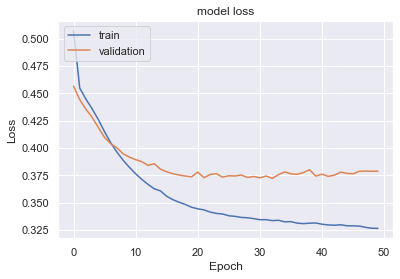

In [62]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

<h4>Observations:</h4>-The increasing gap validation loss curve between train and suggests that the model is continuing to improve its fit to the training data, but these improvements are not translating to the validation data.
<br>-This could be a sign of overfitting.

In [63]:
#Training the model to early stop

model_e = Sequential()
model_e.add(Dense(units=32, activation='relu', input_dim=11))
model_e.add(Dense(units=16, activation='relu'))
model_e.add(Dense(units=1, activation='sigmoid'))


# Compile the model
model_e.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])


 



In [64]:
#Importing classback API
from keras import callbacks


# Define early stopping
early_stopping = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Train the model with early stopping
history_e = model_e.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    batch_size=32, callbacks=[early_stopping], verbose=1)



Epoch 1/50
200/200 [==============================] - 3s 6ms/step - loss: 0.5134 - recall_3: 0.0176 - val_loss: 0.4606 - val_recall_3: 0.0123
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4493 - recall_3: 0.0989 - val_loss: 0.4375 - val_recall_3: 0.0951
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4352 - recall_3: 0.1327 - val_loss: 0.4280 - val_recall_3: 0.1718
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4257 - recall_3: 0.1741 - val_loss: 0.4200 - val_recall_3: 0.1871
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4158 - recall_3: 0.2109 - val_loss: 0.4124 - val_recall_3: 0.2454
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4055 - recall_3: 0.2446 - val_loss: 0.4079 - val_recall_3: 0.2485
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3962 - recall_3: 0.2669 - val_loss: 0.4056 - val_recall_3: 0.3190
Epoch 

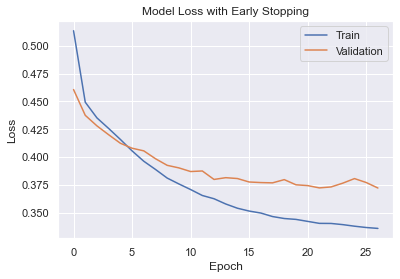

In [65]:
# Plot training loss and validation loss
plt.plot(history_e.history['loss'])
plt.plot(history_e.history['val_loss'])
plt.title('Model Loss with Early Stopping')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

<h4>Observations:</h4><br>-Training loss decreases steadily as the number of epochs increases. This indicates that the model is learning and improving its performance on the training data over time. 
<br>-The validation loss, which also decreases initially but starts to plateau and diverge from the training loss around epoch 10. This could suggest that the model is beginning to overfit the training data.

200/200 [==============================] - 1s 2ms/step


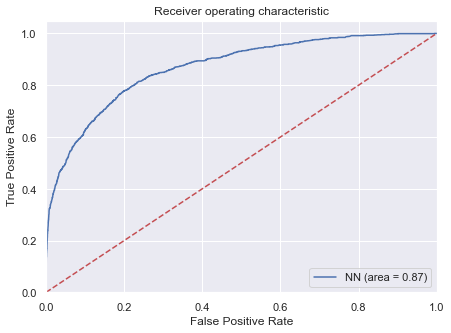

In [66]:
# ROC-AUC on training set
NN_roc_auc_train= roc_auc_score(y_train.astype(float), model_e.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train.astype(float), model_e.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

50/50 [==============================] - 0s 2ms/step


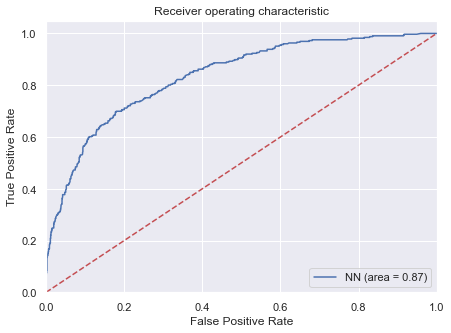

In [67]:
# ROC-AUC on validation set
NN_roc_auc_val = roc_auc_score(y_val.astype(float), model_e.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val.astype(float), model_e.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()



In [68]:
# Optimal threshold using AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train.astype(float), model_e.predict(X_train))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

200/200 [==============================] - 1s 2ms/step
0.21540754


The optimal threshold found using ROC-AUC curve is 0.17

50/50 [==============================] - 0s 2ms/step


,0,1,2,3
Metric,Accuracy,Precision,Recall,F1 Score
Score,0.780625,0.474227,0.705521,0.567201


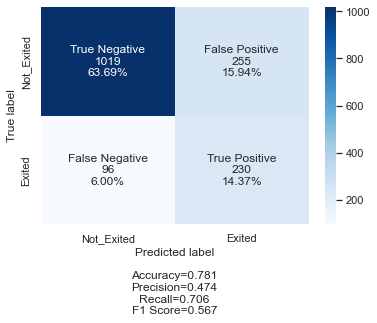

In [69]:
# Predictions on validation set
y_pred_val = model_e.predict(X_val)

# Applying the optimal threshold
y_pred_val_binary = (y_pred_val > optimal_threshold_auc_roc).astype(int)

# Creating confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val_binary)

# Define labels and categories
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]

# Plotting confusion matrix
make_confusion_matrix(cm_val, group_names=labels, categories=categories, cmap="Blues")
 

- **Accuracy (0.780625)**: This indicates that the model1 correctly predicted the customer churn for about 78.0625% of the customers in the dataset.

- **Precision (0.474227)**: This score suggests that when the model1 predicts a customer will churn, it is correct about 47.4227% of the time.

- **Recall (0.705521)**: This score tells us that the model1 correctly identified 70.5521% of the customers who actually churned. 
- **F1 Score (0.567201)**



### Model Improvement: Neural Network model with Dropout

In [70]:
#Initializing the neural network
model2 = Sequential()

#Adding the input layer with 32 neurons and relu as activation function
model2.add(Dense(32,activation='relu',input_dim = 11))

# Adding dropout with ratio of 0.2
model2.add(Dropout(0.2))

# Adding the first hidden layer with 16 neurons with relu as activation functions
model2.add(Dense(16,activation='relu'))

# Adding dropout with ratio of 0.2
model2.add(Dropout(0.2))
# Adding the second hidden layer with 8 neurons with relu as activation functions
#model2.add(Dense(8,activation='relu'))

# Adding the output layer
model2.add(Dense(1, activation = 'sigmoid'))

In [71]:
model2.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

In [72]:
# Summary of the model
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 929 (3.63 KB)
Trainable params: 929 (3.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
history2 = model2.fit(X_train,y_train,batch_size=32,epochs=50,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])


Epoch 1/50
200/200 [==============================] - 2s 4ms/step - loss: 0.5476 - recall_4: 0.0521 - val_loss: 0.4807 - val_recall_4: 0.0000e+00
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4837 - recall_4: 0.0207 - val_loss: 0.4544 - val_recall_4: 0.0337
Epoch 3/50
200/200 [==============================] - 1s 5ms/step - loss: 0.4705 - recall_4: 0.0805 - val_loss: 0.4462 - val_recall_4: 0.1104
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4635 - recall_4: 0.1127 - val_loss: 0.4401 - val_recall_4: 0.1012
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4528 - recall_4: 0.1204 - val_loss: 0.4364 - val_recall_4: 0.1564
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4486 - recall_4: 0.1541 - val_loss: 0.4315 - val_recall_4: 0.1503
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4452 - recall_4: 0.1817 - val_loss: 0.4290 - val_recall_4: 0.1656
Ep

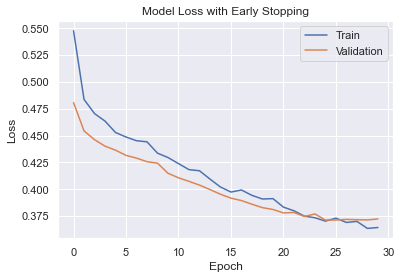

In [74]:
# Plot training loss and validation loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss with Early Stopping')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

<h4>Observations:</h4>Towards the end, the training loss continues to decrease slightly while the validation loss remains relatively stable. This could suggest that the model is starting to overfit.

200/200 [==============================] - 0s 2ms/step


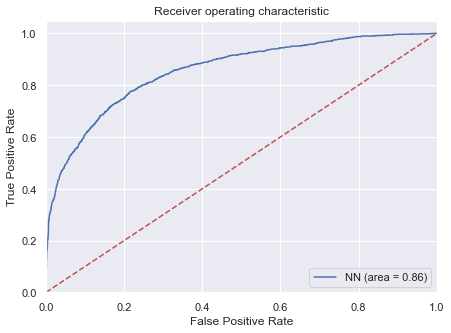

In [75]:
# ROC-AUC on training set
NN_roc_auc_train= roc_auc_score(y_train.astype(float), model2.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train.astype(float), model2.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

50/50 [==============================] - 0s 3ms/step


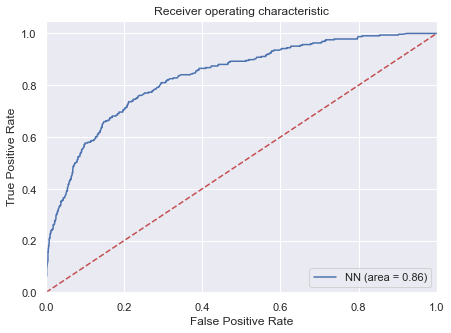

In [76]:
# ROC-AUC on validation set
NN_roc_auc_val = roc_auc_score(y_val.astype(float), model2.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val.astype(float), model2.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [77]:
# Optimal threshold using AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train.astype(float), model2.predict(X_train))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

200/200 [==============================] - 1s 2ms/step
0.18691029


50/50 [==============================] - 0s 3ms/step


,0,1,2,3
Metric,Accuracy,Precision,Recall,F1 Score
Score,0.7775,0.47012,0.723926,0.570048


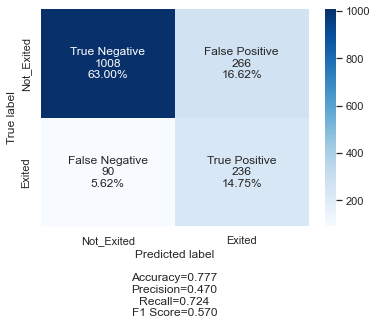

In [78]:
# Predictions on validation set
y_pred_val = model2.predict(X_val)

# Applying the optimal threshold
y_pred_val_binary = (y_pred_val > optimal_threshold_auc_roc).astype(int)

# Creating confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val_binary)

# Define labels and categories
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]

# Plotting confusion matrix
make_confusion_matrix(cm_val, group_names=labels, categories=categories, cmap="Blues")

1. **Accuracy**: Model 2 has an accuracy of 0.7775, which is higher than the 0.718125 of Model 1.Model 2 is correctly predicting whether a customer will leave the bank or not more often than Model 1.

2. **Precision**: The precision of Model 2 is 0.47012, which is also higher than the 0.392796 of Model 1.Model 2, when predicting that a customer will leave the bank, is correct more often than Model 1.

3. **Recall**: The recall of Model 2 is 0.723926, which is slightly higher than the 0.702454 of Model 1. This means Model 2 is slightly better at correctly identifying customers who will actually leave the bank.

4. **F1 Score**: The F1 score of Model 2 is 0.570048, which is higher than the 0.50385 of Model 1. 

### Model Improvement: Neural Network model with Hyperparameter tuning

In [79]:
def create_model(layer_1=32, layer_2=16, lr=0.001, dropout_rate1=0.0, dropout_rate2=0.0):
    # Initializing the neural network
    model_3 = Sequential()
    
    # Adding the input layer (by specifying input dimension)
    model_3.add(Dense(layer_1, activation='relu', input_dim=X_train.shape[1]))
    # Adding dropout before the hidden layer
    model_3.add(Dropout(dropout_rate1))

    # Adding the hidden layer
    model_3.add(Dense(layer_2, activation='relu'))
    # Adding dropout after the hidden layer
    model_3.add(Dropout(dropout_rate2))

    # Adding the output layer
    # We have an output of 1 node, which is the desired dimensions of our output (stay with the bank or not)
    # We use the sigmoid because we want probability outcomes
    model_3.add(Dense(1, activation='sigmoid'))

    # Adding Adam initializer
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    
    # Compile model
    model_3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])
    
    return model_3





In [80]:
keras_estimator = KerasClassifier(build_fn=create_model, verbose=1,dropout_rate1=0.0,dropout_rate2=0.0,lr=0.001)


In [81]:
from sklearn.model_selection import GridSearchCV
# Define the grid search parameters
param_grid = {
    'batch_size': [32, 64, 128],
    'lr': [0.01, 0.001, 0.1],
    'dropout_rate1': [0.0, 0.1, 0.2],
    'dropout_rate2': [0.0, 0.1, 0.2]
}

kfold_splits = 3

# Applying GridSearchCV
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,
                    n_jobs=-1)

In [82]:
## Fitting Grid model
grid_result = grid.fit(X_train, y_train,validation_data = (X_val,y_val),verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# Printing mean 
means = grid_result.cv_results_['mean_test_score']
# Printing standard deviation
stds = grid_result.cv_results_['std_test_score']
# Printing best parameters
params = grid_result.cv_results_['params']



Fitting 3 folds for each of 81 candidates, totalling 243 fits
200/200 [==============================] - 5s 11ms/step - loss: 0.4738 - recall_5: 0.0667 - val_loss: 0.4353 - val_recall_5: 0.1472
Best: 0.811719 using {'batch_size': 32, 'dropout_rate1': 0.0, 'dropout_rate2': 0.1, 'lr': 0.01}


<h4>Observations:</h4><b>The best combination found from Grid Search is a batch size of 32 and a learning rate (lr) of 0.01.

In [83]:
# Creating the model
model3=create_model(lr=grid_result.best_params_['lr'])
# Printing model summary
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                384       
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_20 (Dense)            (None, 1)                 17        
                                                                 
Total params: 929 (3.63 KB)
Trainable params: 929 (3.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
# Fitting the model
history3= model3.fit(X_train, y_train, epochs=50, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])


Epoch 1/50
200/200 [==============================] - 3s 7ms/step - loss: 0.4611 - recall_6: 0.0936 - val_loss: 0.4328 - val_recall_6: 0.1411
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4127 - recall_6: 0.2876 - val_loss: 0.4004 - val_recall_6: 0.3620
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3859 - recall_6: 0.3451 - val_loss: 0.3827 - val_recall_6: 0.2945
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3694 - recall_6: 0.3880 - val_loss: 0.3771 - val_recall_6: 0.3160
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3659 - recall_6: 0.4011 - val_loss: 0.3747 - val_recall_6: 0.3436
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3625 - recall_6: 0.4210 - val_loss: 0.3761 - val_recall_6: 0.3436
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3607 - recall_6: 0.4172 - val_loss: 0.3788 - val_recall_6: 0.3558
Epoch 

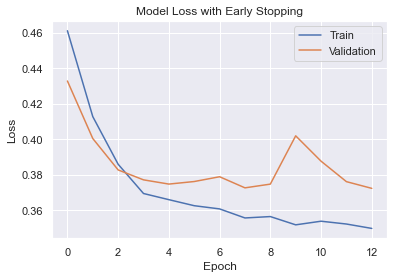

In [85]:
# Plot training loss and validation loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss with Early Stopping')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

<h4>Observations:</h4>

The validation loss decreases initially but starts fluctuating after around epoch 6, which could be an indication of overfitting.

200/200 [==============================] - 0s 2ms/step


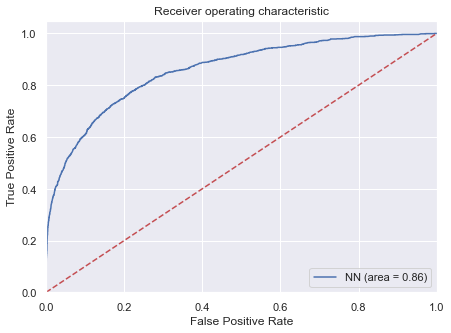

In [86]:
# ROC-AUC on training set
NN_roc_auc_train= roc_auc_score(y_train.astype(float), model3.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train.astype(float), model3.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

50/50 [==============================] - 0s 2ms/step


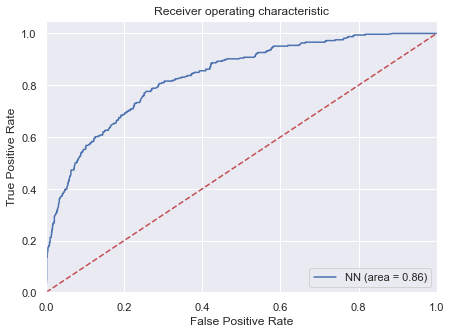

In [87]:
# ROC-AUC on validation set
NN_roc_auc_val = roc_auc_score(y_val.astype(float), model3.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val.astype(float), model3.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [88]:
# Optimal threshold using AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train.astype(float), model3.predict(X_train))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

200/200 [==============================] - 1s 2ms/step
0.18877062


50/50 [==============================] - 0s 2ms/step


,0,1,2,3
Metric,Accuracy,Precision,Recall,F1 Score
Score,0.765,0.451172,0.708589,0.551313


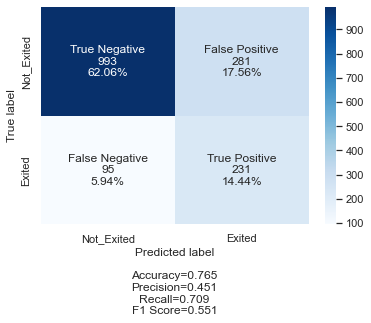

In [89]:
# Predictions on validation set
y_pred_val = model3.predict(X_val)

# Applying the optimal threshold
y_pred_val_binary = (y_pred_val > optimal_threshold_auc_roc).astype(int)

# Creating confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val_binary)

# Define labels and categories
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]

# Plotting confusion matrix
<h4>Observations:</h4>make_confusion_matrix(cm_val, group_names=labels, categories=categories, cmap="Blues")


<h4>Observations:</h4>

1. **Accuracy (0.765)**: Model3 correctly predicted whether a customer will leave the bank or not about 76.5% of the time.

2. **Precision (0.451172)**: Model3 predicted that a customer will leave the bank, it was correct only about 45.12% of the time.

3. **Recall (0.708589)**: Model3 correctly identified 70.86% of the customers who actually left the bank.

4. **F1 Score (0.551313)**: The F1 Score is approximately 0.55, which is not very high.



### Model Improvement: Neural Network model with balanced data[SMOTE]

In [90]:
from imblearn.over_sampling import SMOTE
sm  = SMOTE(random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train) 
print('After OverSampling, the shape of train_X: {}'.format(X_train_over.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

After OverSampling, the shape of train_X: (10192, 11)
After OverSampling, the shape of train_y: (10192,) 



In [91]:
Oversampled_count = y_train_over.value_counts()
Oversampled_count

0    5096
1    5096
Name: Exited, dtype: int64

In [92]:
#Initializing the neural network
model4 = Sequential()

#Adding the input layer with 32 neurons and relu as activation function
model4.add(Dense(32,activation='relu',input_dim = 11))

# Adding dropout with ratio of 0.2
model4.add(Dropout(0.2))

# Adding the first hidden layer with 16 neurons with relu as activation functions
model4.add(Dense(16,activation='relu'))

# Adding dropout with ratio of 0.2
model4.add(Dropout(0.2))

# Adding the second hidden layer with 8 neurons with relu as activation functions
#model2.add(Dense(8,activation='relu'))

# Adding the output layer
model4.add(Dense(1, activation = 'sigmoid'))

In [93]:
model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32)                384       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 929 (3.63 KB)
Trainable params: 929 (3.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
# Complining the model with binary cross entropy as loss and recall. as metrics
model4.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

# Fitting the model on train and test with batch_size of 32, and early stopping
history4 = model4.fit(X_train_over,y_train_over,batch_size=32,epochs=50,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])


Epoch 1/50
319/319 [==============================] - 4s 5ms/step - loss: 0.6445 - recall_8: 0.5500 - val_loss: 0.5368 - val_recall_8: 0.5061
Epoch 2/50
319/319 [==============================] - 1s 3ms/step - loss: 0.5973 - recall_8: 0.6576 - val_loss: 0.5684 - val_recall_8: 0.6380
Epoch 3/50
319/319 [==============================] - 1s 4ms/step - loss: 0.5772 - recall_8: 0.6797 - val_loss: 0.5409 - val_recall_8: 0.6227
Epoch 4/50
319/319 [==============================] - 1s 4ms/step - loss: 0.5581 - recall_8: 0.7019 - val_loss: 0.5437 - val_recall_8: 0.6748
Epoch 5/50
319/319 [==============================] - 1s 4ms/step - loss: 0.5432 - recall_8: 0.7208 - val_loss: 0.5284 - val_recall_8: 0.6472
Epoch 6/50
319/319 [==============================] - 1s 4ms/step - loss: 0.5312 - recall_8: 0.7296 - val_loss: 0.5172 - val_recall_8: 0.6442
Epoch 7/50
319/319 [==============================] - 1s 4ms/step - loss: 0.5219 - recall_8: 0.7308 - val_loss: 0.5468 - val_recall_8: 0.6933
Epoch 

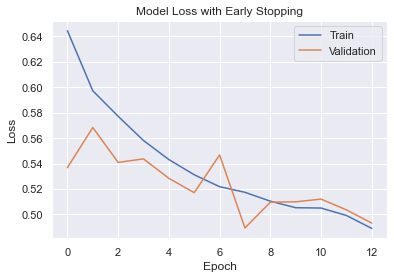

In [96]:
# Plot training loss and validation loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model Loss with Early Stopping')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

<h4>Observations:</h4>The validation loss is fluctuating which could be an indication of overfitting.

319/319 [==============================] - 1s 2ms/step


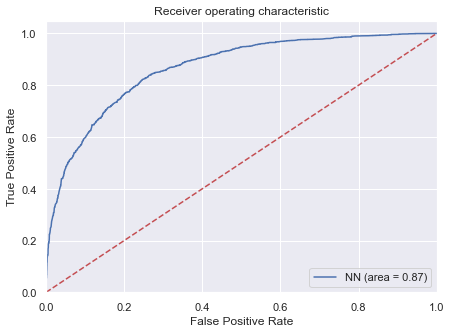

In [97]:
# ROC-AUC on training set
NN_roc_auc_train= roc_auc_score(y_train_over.astype(float), model4.predict(X_train_over))
fpr, tpr, thresholds = roc_curve(y_train_over.astype(float),model4.predict(X_train_over))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

50/50 [==============================] - 0s 3ms/step


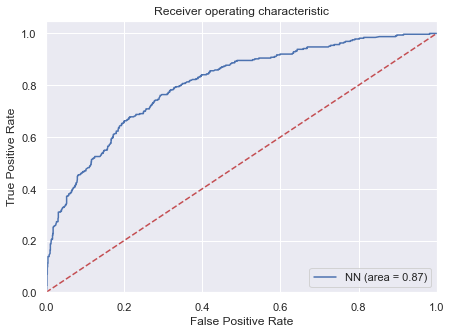

In [98]:
# ROC-AUC on validation set
NN_roc_auc_val = roc_auc_score(y_val.astype(float), model4.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val.astype(float), model4.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [99]:
# Optimal threshold using AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train_over.astype(float), model4.predict(X_train_over))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

319/319 [==============================] - 1s 2ms/step
0.45771956


50/50 [==============================] - 0s 2ms/step


,0,1,2,3
Metric,Accuracy,Precision,Recall,F1 Score
Score,0.73625,0.413978,0.708589,0.522624


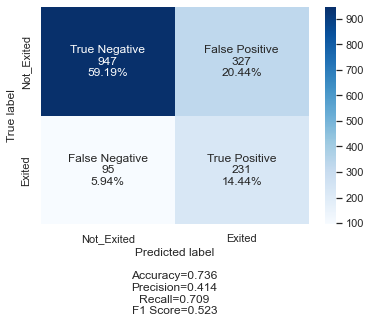

In [100]:
# Predictions on validation set
y_pred_val = model4.predict(X_val)

# Applying the optimal threshold
y_pred_val_binary = (y_pred_val > optimal_threshold_auc_roc).astype(int)

# Creating confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val_binary)

# Define labels and categories
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]

# Plotting confusion matrix
make_confusion_matrix(cm_val, group_names=labels, categories=categories, cmap="Blues")

<h4>Observations:</h4>

- **Accuracy (0.73625)**: Model4 correctly predicted whether a customer will leave the bank or not for about 73.625% of the customers.

- **Precision (0.413978)**:Out of all the customers that your model4 predicted would leave the bank, only about 41.3978% actually left.

- **Recall (0.708589)**: Model4 correctly identified 70.8589% of the total customers who actually left the bank.

- **F1 Score (0.522624)**


## Final Model

<h4>Observations:</h4>We determine that the model incorporating the Adam optimizer and dropout rate of 0.2 (model2) exhibited the highest recall value among all considered models. In the context of our specific problem statement, where correctly identifying customers who are likely to leave is crucial, recall serves as an important metric.

So we select <b>model2 as our final model for predicting values on the test set. 

63/63 [==============================] - 0s 2ms/step


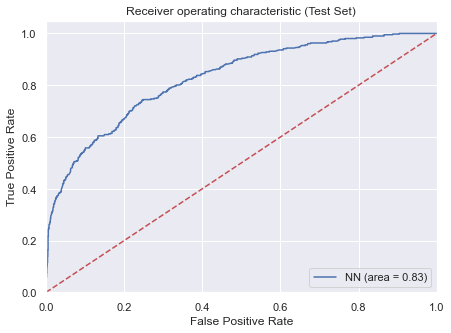

In [101]:
# ROC-AUC on test set using model incorporating the Adam optimizer and dropout rate of 0.2 (model2) 
NN_roc_auc_test = roc_auc_score(y_test.astype(float), model2.predict(X_test))
fpr_test, tpr_test, thresholds_test = roc_curve(y_test.astype(float), model2.predict(X_test))
plt.figure(figsize=(7, 5))
plt.plot(fpr_test, tpr_test, label="NN (area = %0.2f)" % NN_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic (Test Set)")
plt.legend(loc="lower right")
plt.show()




<h4>Observations:</h4><br>-An AUC score of 0.83 on the test set indicates a relatively good performance of the model in distinguishing  between positive and negative instances.
<br>-Therfore the model has a high probability of ranking a randomly chosen positive instance higher than a randomly chosen negative instance. 

In [102]:
# Optimal threshold using AUC-ROC curve on test set
optimal_idx_test = np.argmax(tpr_test - fpr_test)
optimal_threshold_auc_roc_test = thresholds_test[optimal_idx_test]
print("Optimal Threshold (Test Set):", optimal_threshold_auc_roc_test)


Optimal Threshold (Test Set): 0.1763247


63/63 [==============================] - 0s 2ms/step


,0,1,2,3
Metric,Accuracy,Precision,Recall,F1 Score
Score,0.73625,0.413978,0.708589,0.522624


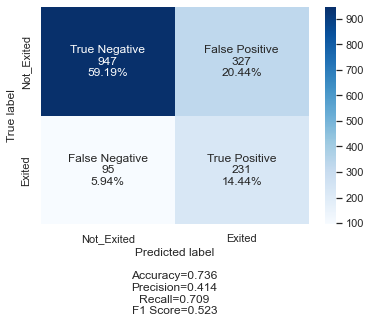

In [104]:
# Predictions on test set
y_pred_test = model2.predict(X_test)

# Applying the optimal threshold on test set
y_pred_test_binary = (y_pred_test > optimal_threshold_auc_roc_test).astype(int)

# Creating confusion matrix for test set
cm_test = confusion_matrix(y_test, y_pred_test_binary)

labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]

# Plotting confusion matrix
make_confusion_matrix(cm_val, group_names=labels, categories=categories, cmap="Blues")

<h4>Observations:</h4>

<b>Accuracy (0.73625):</b> The model correctly predicted the customer churn for about 73.625% of the customers in the test set.

<b>Precision (0.413978):</b> When the model predicts a customer will churn, it is correct about 41.3978% of the time. Te model may be overestimating customer churn, which could lead to unnecessary retention efforts.

<b>Recall (0.708589):</b> The model correctly identified 70.8589% of the customers who actually churned. This is important to identify as many churning customers as possible.

<b>F1 Score (0.522624):</b> An F1 score of 52.2624% indicates that there is room for improvement in achieving a better balance.

## Actionable Insights and Recommendations 

**What recommedations would you suggest to the bank?**

* 

**Engagement of dormant Members:** The bank might launch a campaign to turn dormant members into active clients. To help these clients get the most out of their accounts, this can entail contacting them with exclusive deals or incentives or offering them individualized financial guidance.

**Product Retention and Diversification:** There is a chance to encourage customers to diversify their product holdings because the minority of customers who only own one product (51%). Create retention techniques to hold on to clients that possess numerous items, like incentives or packaged services.

**Services That Consider Age:** Given that quitting a bank is positively correlated with age, you should think about offering age-specific services or incentives to keep customers in particular age ranges. Customizing services to fit various stages of life could increase client retention.

**Retention based on Tenure:** Higher rates of customer churn are seen among those with shorter tenures—one year and zero years. Use promotions, individualized services, or onboarding programs to win over more customers throughout the early years of their bank relationship.


